In [9]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


In [10]:
df = pd.read_excel("Superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [12]:
#furniture sales data
furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

#### Data Preprocessing

In [13]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [14]:
'''
This step includes removing columns we do not need, check missing values,
aggregate sales by date and so on.
'''
#Selecting only ['Order Date','Sales']
furniture=furniture[['Order Date','Sales']]

In [15]:
furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


In [16]:
#arranging the data in increasing order by date
furniture = furniture.sort_values('Order Date')
furniture.head()

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940


In [17]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [18]:
# Total Sales by day
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [19]:
furniture = furniture.set_index('Order Date')
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [20]:
'''
use the averages daily sales value for that month instead,
and we are using the start of each month as the timestamp.
'''
# Sales at starting of the month : MS
# for more resample offsets : http://pandas.pydata.org/pandas-docs/stable/user_guide/
#                                timeseries.html#dateoffset-objects
y = furniture['Sales'].resample('MS').mean()
# depicting 2017 sales
y['2017']

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

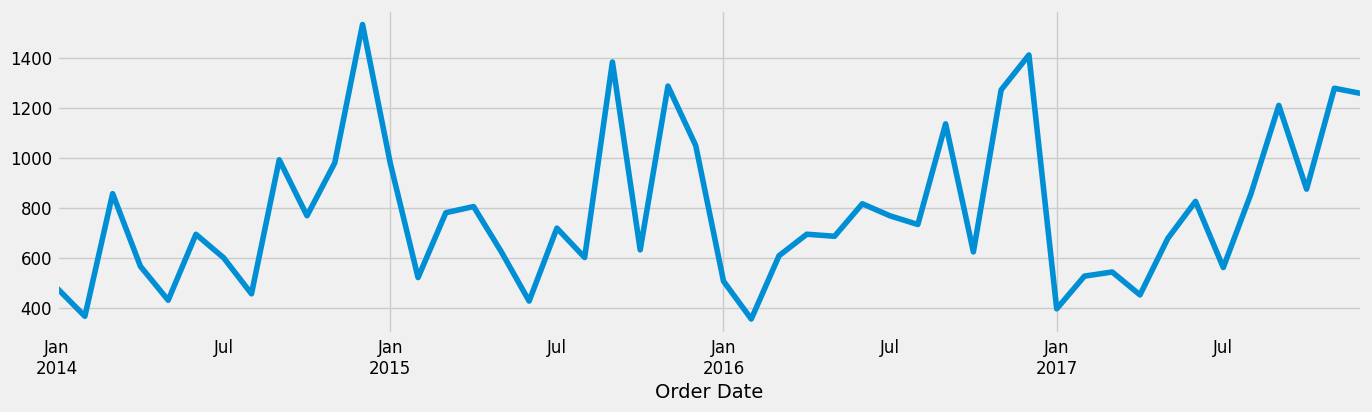

In [21]:
plt.figure(figsize=(15,4))
y.plot()
plt.show()


##### Observation:
The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

'''
We can also visualize our data using a method called time-series decomposition
that allows us to decompose our time series into three distinct
components: trend, seasonality, and noise.
'''

<Figure size 2000x1000 with 0 Axes>

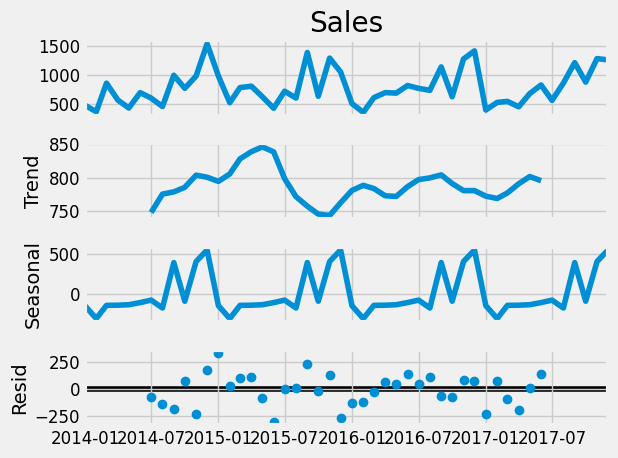

In [22]:
plt.figure(figsize=(20, 10))
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

###### Graphs:
*  Observed Data: This subplot will display the original sales data over time.

*  Trend Component: This subplot will show the estimated trend in the sales data. The trend represents the underlying pattern or long-term movement in the data.

*  Seasonal Component: This subplot will display the estimated seasonal variation in the sales data. The seasonal component captures repetitive patterns that occur at fixed intervals, such as monthly or quarterly seasonality.

*  Residual Component: This subplot will show the estimated residuals or errors. Residuals represent the differences between the observed data and the combined effect of the trend and seasonal components. Smaller residuals indicate a better fit of the decomposition model.
###### Observation:
The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.

##### Test for Stationarity

In [23]:
# Performing Augmented Dickey-Fuller Test
# ADF - Test - null hypothesis: data is non-stationary
# if p-value < 0. 5 : reject the null hypothesis
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(y, autolag='AIC')
print(f'ADF Statistics: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')
# Since p-value < 0.05 
# Therefore, we reject the Null Hypothesis that the data is non-stationary
# Finally our data is stationary

ADF Statistics: -5.191070187339271
p-value: 9.168756655665654e-06


The data is stationary

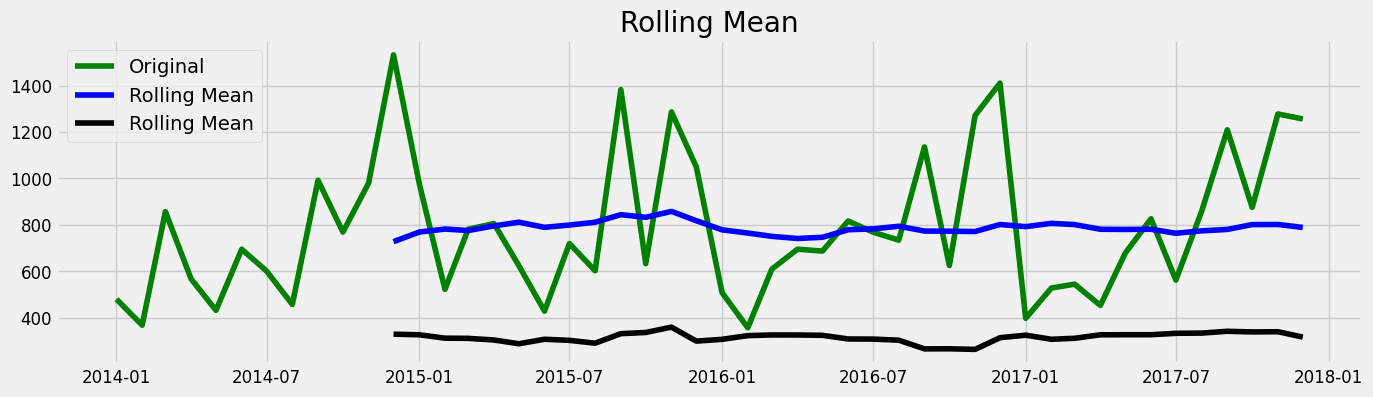

In [24]:
# Determing rolling statistics
roll_mean = y.rolling(12).mean()
roll_sd = y.rolling(12).std()
# Plot rolling statistics:
plt.figure(figsize=(15,4))
plt.plot(y, color='green',label='Original')
plt.plot(roll_mean, color='blue', label='Rolling Mean')
plt.plot(roll_sd, color='black', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')
plt.show(block=False)

##### Model Selection

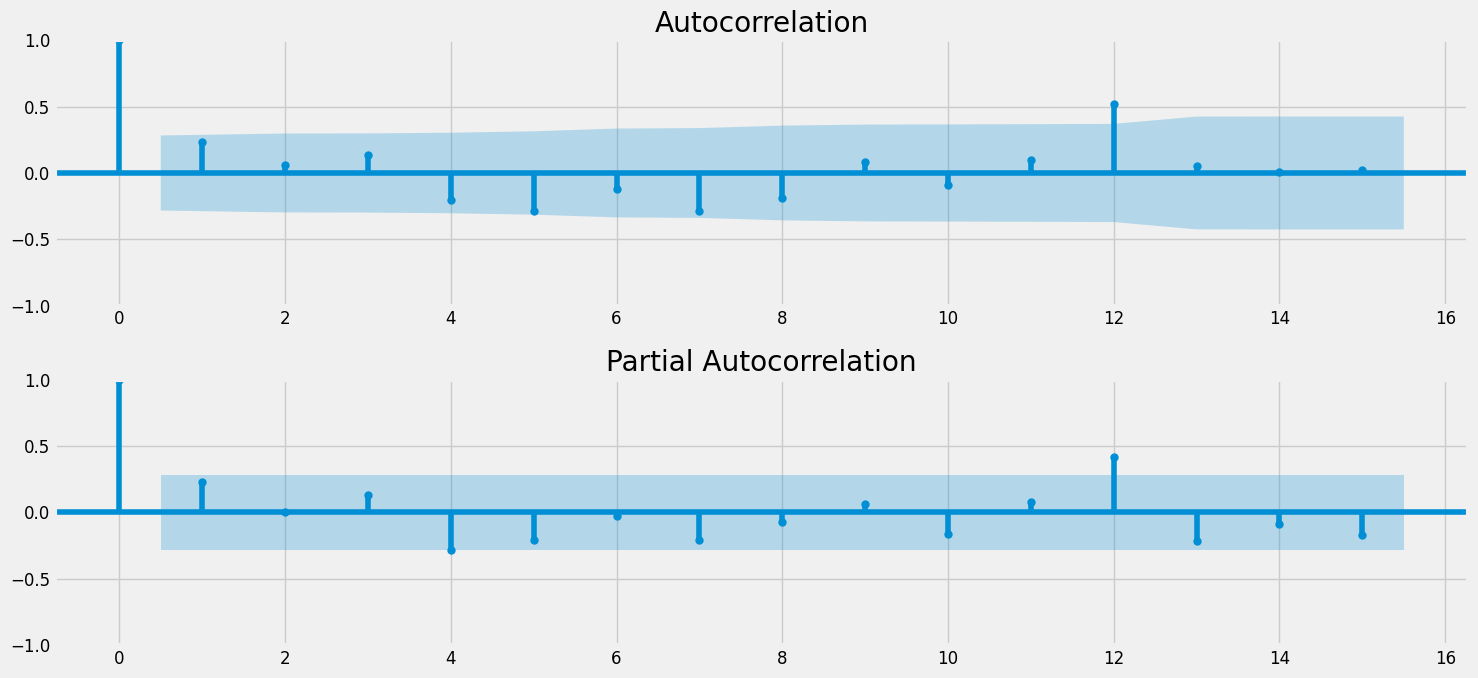

In [25]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(y.values.squeeze(), lags=15, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(y.values.squeeze(), lags=15, ax=ax)
plt.tight_layout()
plt.show()

##### Interpretation of acf-pacf plots:
*  Provides the model’s orders such as p for AR and q for MA to select the best model for forecasting.
##### Auto-Regressive Model
*  The Auto-Regressive (AR) model assumes that the current value (y_t) is dependent on previous values (y_(t-1), y_(t-2), …). Because of this assumption, we can build a linear regression model.
*  To figure out the order of an AR model, you need to look at the PACF.
##### Moving Average Model
*  The Moving Average (MA) model assumes that the current value (y_t) is dependent on the error terms including the current error (𝜖_t, 𝜖_(t-1),…). Because error terms are random, there’s no linear relationship between the current value and the error terms.


###### Autocorrelation Function (ACF) Plot:

-  The ACF measures the correlation between a time series and its lagged values. It helps identify the relationship between an observation and its past observations at different time lags.

-  Interpretation of Peaks:
      -  Peaks that extend above the significance range indicate significant autocorrelation at that lag.
-        If a peak is significant at lag k, it suggests that there's a relationship between the current observation and the observation k time steps before it.

-    Decay Pattern:
        A slowly decaying ACF indicates a non-stationary time series, possibly requiring differencing.
        A rapidly decaying ACF suggests a stationary time series.

 -   Seasonality:
        Regular spikes at regular intervals might indicate seasonality.
        Seasonality can be determined by the lag value at which the ACF starts to show significant peaks.

###### Partial Autocorrelation Function (PACF) Plot:

-  The PACF measures the correlation between a time series and its lagged values, controlling for the correlation already explained by previous lags. It helps identify the direct relationship between an observation and its lagged values.

  -  Interpretation of Peaks:
        Peaks that extend above the significance range indicate significant partial autocorrelation at that lag.
  -      If a peak is significant at lag k, it suggests that there's a direct relationship between the current observation and the observation k time steps before it, after removing the influence of lags in between.

  -  Identifying AR and MA Order:
   -     The PACF plot helps identify the order of the autoregressive (AR) and moving average (MA) components in a time series.
    -    The AR order can be determined by the last lag in the PACF plot where the peak is significant.
     -   The MA order can be determined by the last lag in the ACF plot where the peak is significant (assuming a slowly decaying PACF).

-    Cut-off Behavior:
 -       If the PACF plot cuts off after a certain lag, it suggests that lags beyond that point do not have a significant direct influence on the current observation.

*  p (AR Order): This parameter represents the number of autoregressive terms included in the model.
*  d (Integration Order): This parameter represents the number of differencing operations applied to the time series to make it stationary.
*  q (MA Order): This parameter represents the number of moving average terms included in the model.
*  s (Seasonal Order): This parameter represents the number of periods in each season. It is used to model the seasonality of the data. 


In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Define the SARIMA parameters based on your analysis
order = (1, 1, 1)         # Non-seasonal order
seasonal_order = (2, 2, 2, 2)  # Seasonal order

# Fit the SARIMA model
sarima_model = SARIMAX(y, order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit(method='powell')
# Print summary of the model
print(sarima_result.summary())

Optimization terminated successfully.
         Current function value: 6.647888
         Iterations: 12
         Function evaluations: 1036
                                       SARIMAX Results                                        
Dep. Variable:                                  Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(2, 2, [1, 2], 2)   Log Likelihood                -319.099
Date:                                Sun, 20 Aug 2023   AIC                            652.197
Time:                                        10:24:44   BIC                            664.526
Sample:                                    01-01-2014   HQIC                           656.744
                                         - 12-01-2017                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [27]:
import itertools
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
s_values = [12]  # Seasonality value, for monthly data

param_grid = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values))

best_aic = float('inf')
best_params = None

for params in param_grid:
    order = params[:3]
    seasonal_order = params[3:]
    # Fit SARIMA model
    sarima_model = SARIMAX(y, order=order, seasonal_order=seasonal_order)
    sarima_result = sarima_model.fit(method='powell')
    
    # Calculate AIC
    aic = sarima_result.aic
    
    # Update best parameters if the current model has a lower AIC
    if aic < best_aic:
        best_aic = aic
        best_params = params


Optimization terminated successfully.
         Current function value: 8.153326
         Iterations: 1
         Function evaluations: 27
Optimization terminated successfully.
         Current function value: 7.785487
         Iterations: 2
         Function evaluations: 125
Optimization terminated successfully.
         Current function value: 5.139280
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 5.060852
         Iterations: 3
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 7.164361
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 7.090537
         Iterations: 9
         Function evaluations: 314
Optimization terminated successfully.
         Current function value: 5.075562
         Iterations: 3
         Function evaluations: 69
Optimization terminated successfully.
 

In [28]:
print('Best parameters are: ',best_params)
print('AIC fro this model is: ', best_aic)

Best parameters are:  (0, 1, 1, 0, 1, 1, 12)
AIC fro this model is:  482.92981426473506


After fitting the data with different combination of models, we got the best parameters as following:

-    p = 0, d = 1, q = 1
-   P = 0, D = 1, Q = 1
-  s = 12


In [29]:
best_pdq = (0, 1, 1)
best_seasonal_pdq = (0, 1, 1, 12)

In [30]:
best_model = sm.tsa.statespace.SARIMAX(y,
                                      order=best_pdq,
                                      seasonal_order=best_seasonal_pdq,
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()

print(best_results.summary().tables[0])

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -238.416
Date:                            Sun, 20 Aug 2023   AIC                            482.833
Time:                                    10:26:13   BIC                            487.499
Sample:                                01-01-2014   HQIC                           484.443
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         


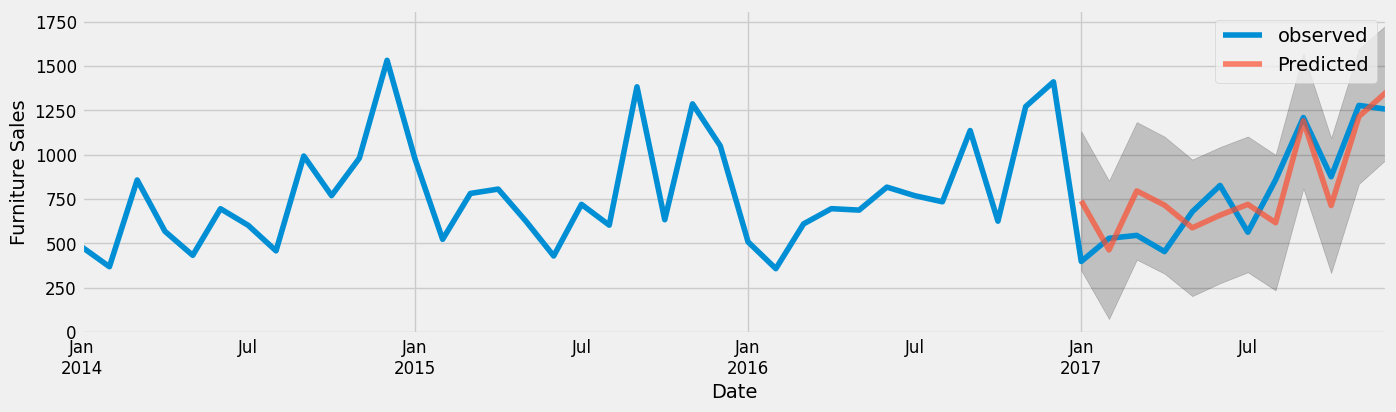

In [31]:
# Fit the final SARIMA model with the best parameters
best_order = best_params[:3]
best_seasonal_order = best_params[3:]

# Get predictions
predictions = best_results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)

predicted_mean = predictions.predicted_mean
pred_ci = predictions.conf_int()

# Create a figure with the specified figsize
plt.figure(figsize=(15, 4))

# Plot original data, predicted mean, and confidence intervals
ax = y.plot(label='observed')
predicted_mean.plot(ax=ax, label='Predicted', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


In [32]:
from sklearn.metrics import mean_squared_error
actual_values = y['2017':]
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predicted_mean))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 185.36844805226303


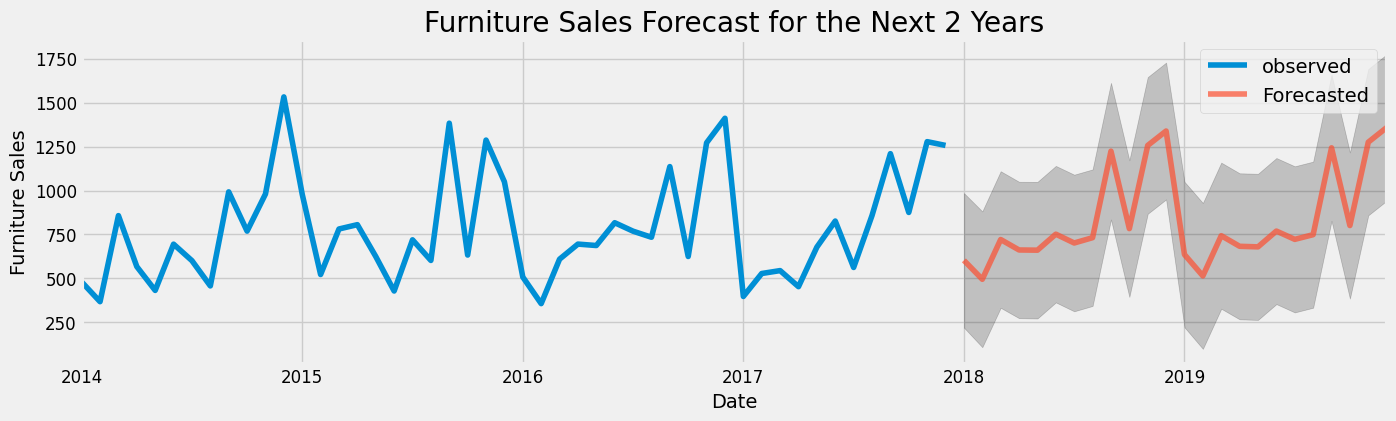

In [33]:
# Generate forecasts for the next 2 years
forecast_periods = 24  # 2 years * 12 months per year
forecast = sarima_result.get_forecast(steps=forecast_periods)

# Get predicted mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# lot original data, predicted mean, and forecasted mean with confidence intervals
ax = y.plot(label='observed', figsize=(15, 4))
forecast_mean.plot(ax=ax, label='Forecasted', alpha=.7)
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.title('Furniture Sales Forecast for the Next 2 Years')
plt.show()

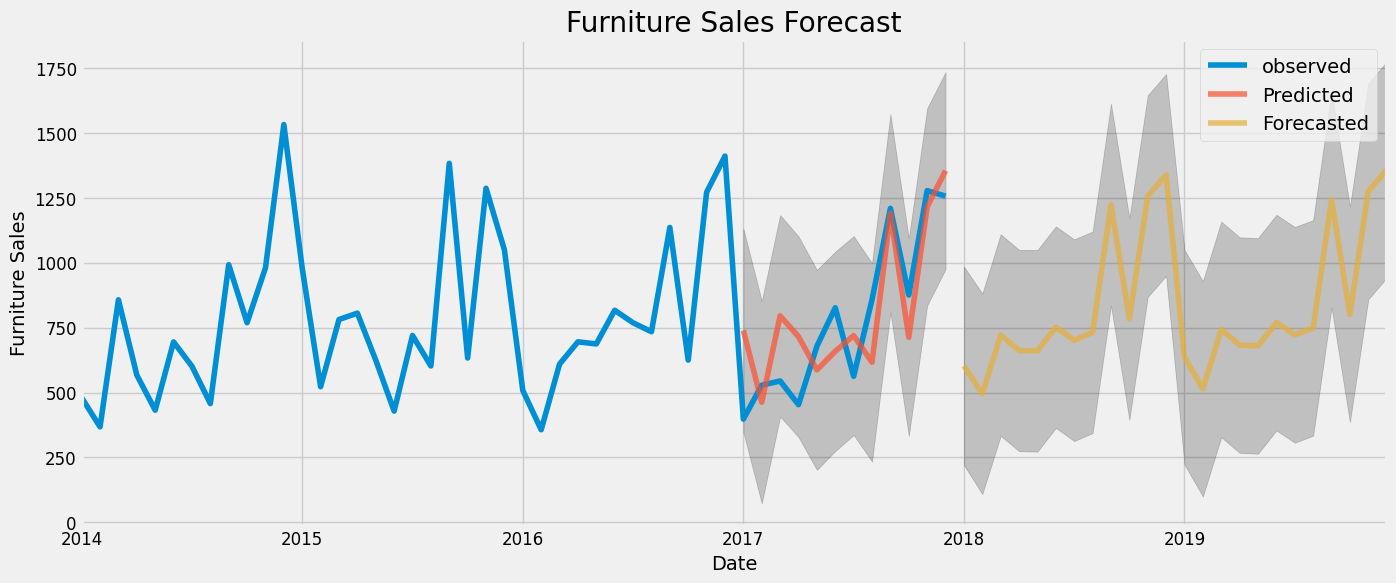

In [34]:
# Create a figure with the specified figsize
plt.figure(figsize=(15, 6))

# Plot original data
ax = y.plot(label='observed')

# Plot one-step ahead forecast
predicted_mean.plot(ax=ax, label='Predicted', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

# Plot forecasted mean for the next 2 years
forecast_mean.plot(ax=ax, label='Forecasted', alpha=.7)
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.title('Furniture Sales Forecast')
plt.show()


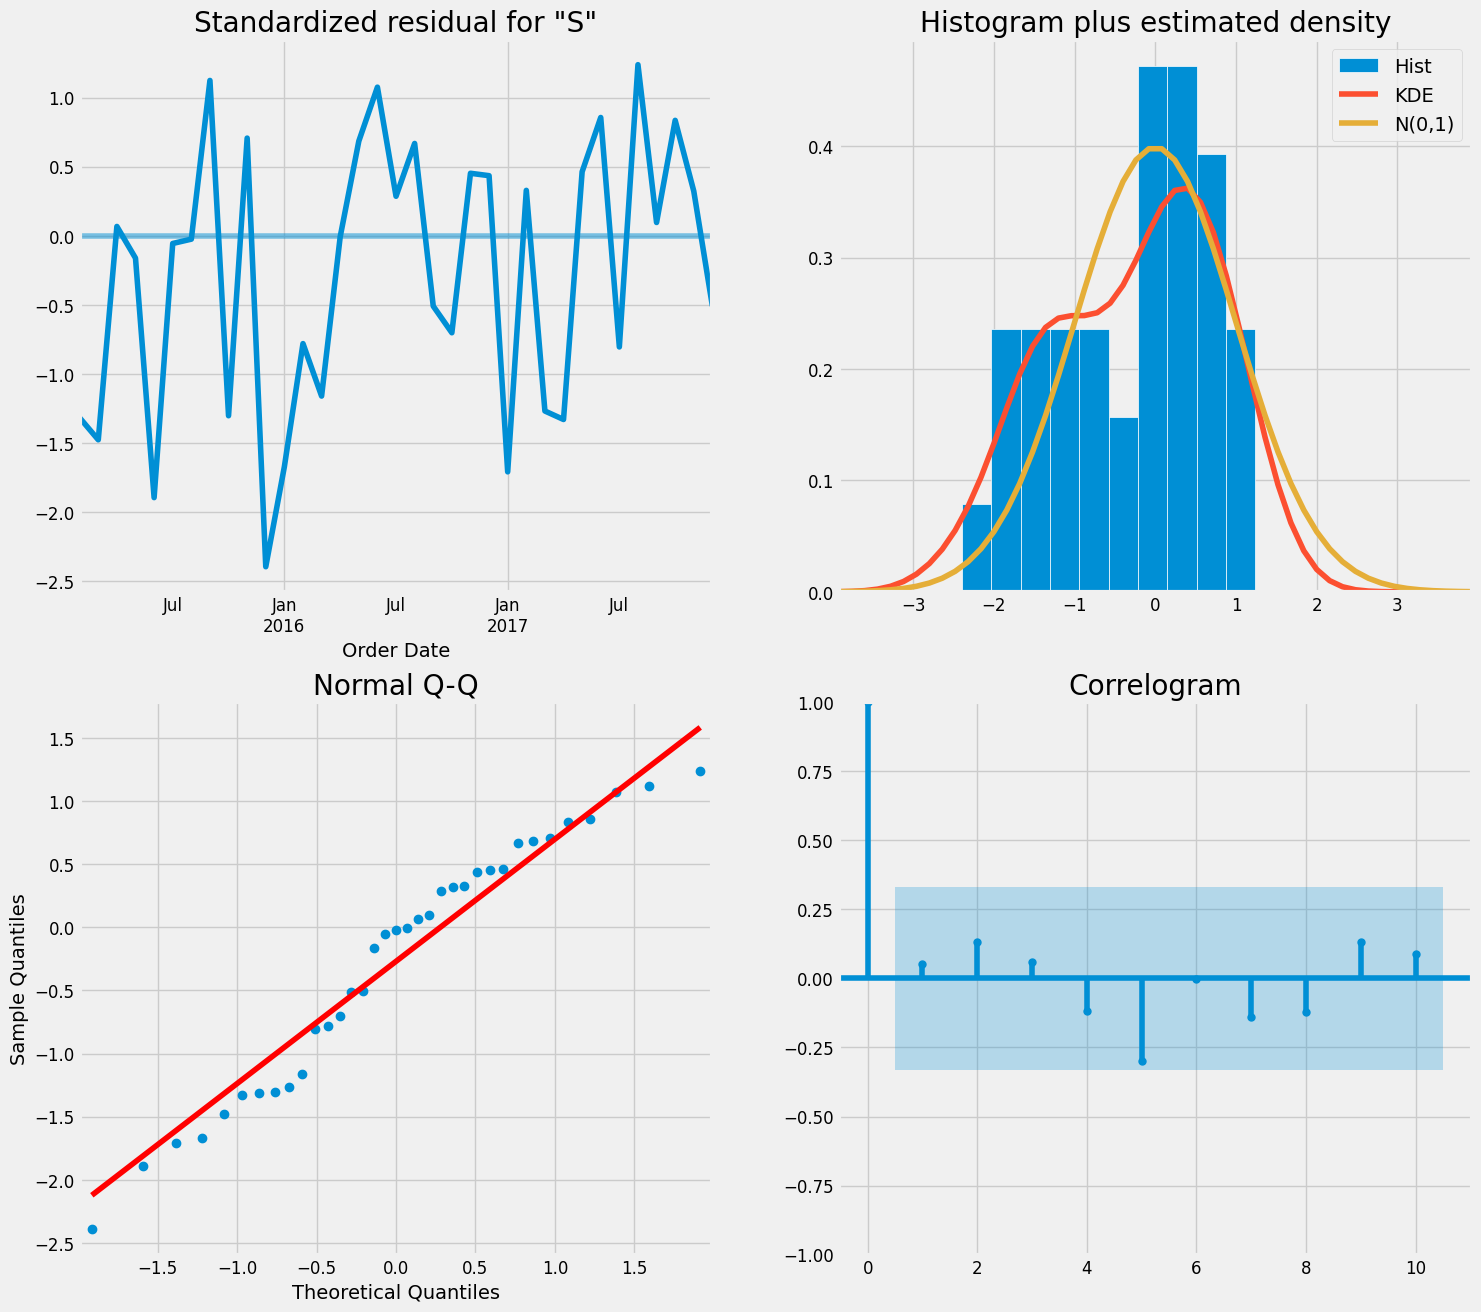

In [35]:
best_results.plot_diagnostics(figsize=(16, 15))
plt.show()